In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import math
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df=df.drop_duplicates()

In [7]:
nulls_df=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df=nulls_df.rename(columns={'index':'header',0:'prop_nulls'})
nulls_df

,prop_nulls
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [8]:
median=df['Age'].median()
df['Age']=df['Age'].fillna(median)
df['Embarked']=df['Embarked'].fillna("Unknown")

In [9]:
nulls_df=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls_df=nulls_df.rename(columns={'index':'header',0:'prop_nulls'})
nulls_df

,prop_nulls
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [10]:
df['Age'] = df['Age'].apply(np.floor)

In [11]:
df['Age'] = df['Age'].astype(int)

In [12]:
df['Age'].value_counts()

28    204
24     31
22     27
30     27
18     26
     ... 
12      1
66      1
53      1
80      1
74      1
Name: Age, Length: 71, dtype: int64

In [13]:
df=df.drop('Cabin',axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 80.1+ KB


In [15]:
df=df.drop('PassengerId',axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 73.1+ KB


In [17]:
df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [18]:
df=df.drop(['Name','Ticket','Embarked','Fare'],axis=1) 
# we dropp all that columns cause are not relevant to the anlisis, also Fare must be 100% correlated with Pclass, so we are not going to use it neither.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int32 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 45.2+ KB


In [20]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
def number_sex(x):
    if x == 'female':
        return 1
    else:
        return 0

df['Sex'] = df['Sex'].apply(number_sex)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
dtypes: int32(1), int64(5)
memory usage: 45.2 KB


In [23]:
X_full=df.select_dtypes(include=np.number)

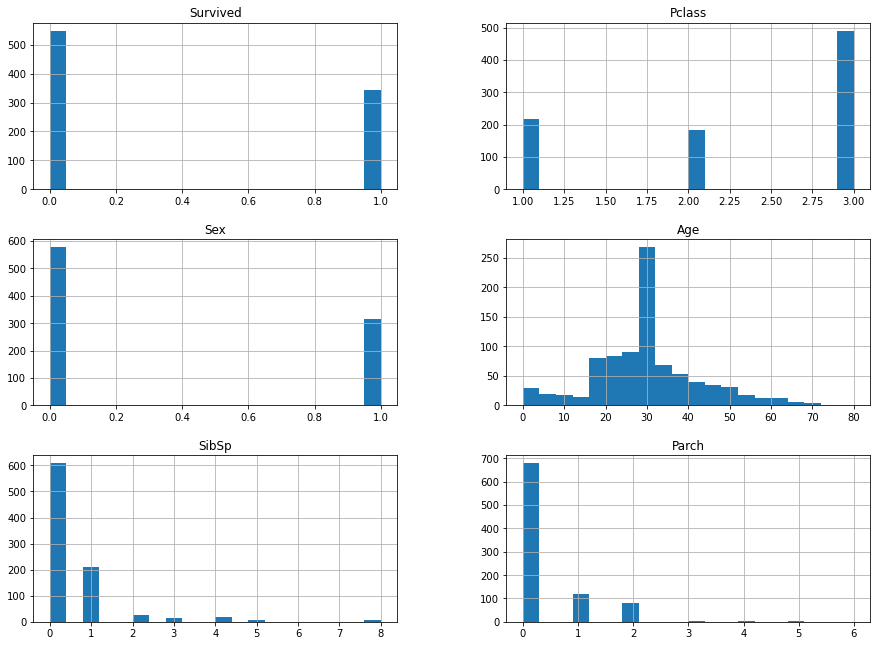

In [24]:
X_full.hist(figsize=(15,15),bins=20,layout=(4,2));

In [25]:
corre_matrix=X_full.corr()
corre_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,0.543351,-0.064909,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.131900,-0.339999,0.083081,0.018443
Sex,0.543351,-0.131900,1.000000,-0.080750,0.114631,0.245489
Age,-0.064909,-0.339999,-0.080750,1.000000,-0.233066,-0.172745
SibSp,-0.035322,0.083081,0.114631,-0.233066,1.000000,0.414838
Parch,0.081629,0.018443,0.245489,-0.172745,0.414838,1.000000


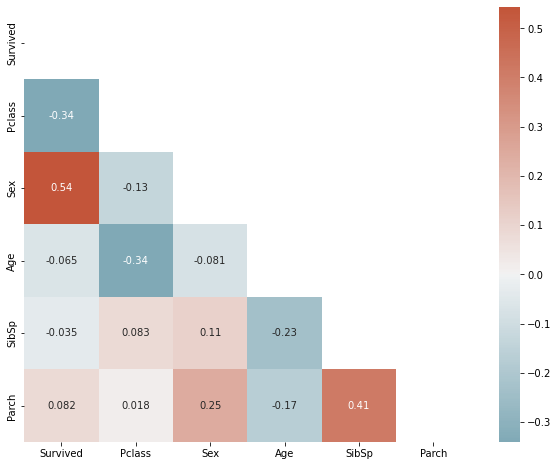

In [26]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True,);

In [27]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.345679,0.523008,0.381594
std,0.486592,0.836071,0.477990,13.028212,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [28]:
# after check the describe we can see there would be a possible outliers in the SibSp and Parch columns 
# if we compare with the mean, but we don't need to drop them or deal with them cause are not typo, and 
# although they may be unusual, they are perfectly real values.